In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

In [2]:
#load xlsx and read
file_name = "/Users/sheiljasheth/Downloads/hr_comma_sep1 (1).xlsx"
data = pd.read_excel(file_name)

In [3]:
#Missing values (QA check)
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


In [4]:
#Correlation Matrix 
numerical_columns = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_montly_hours",
    "time_spend_company",
]

In [5]:
correlation_matrix = data[numerical_columns].corr()

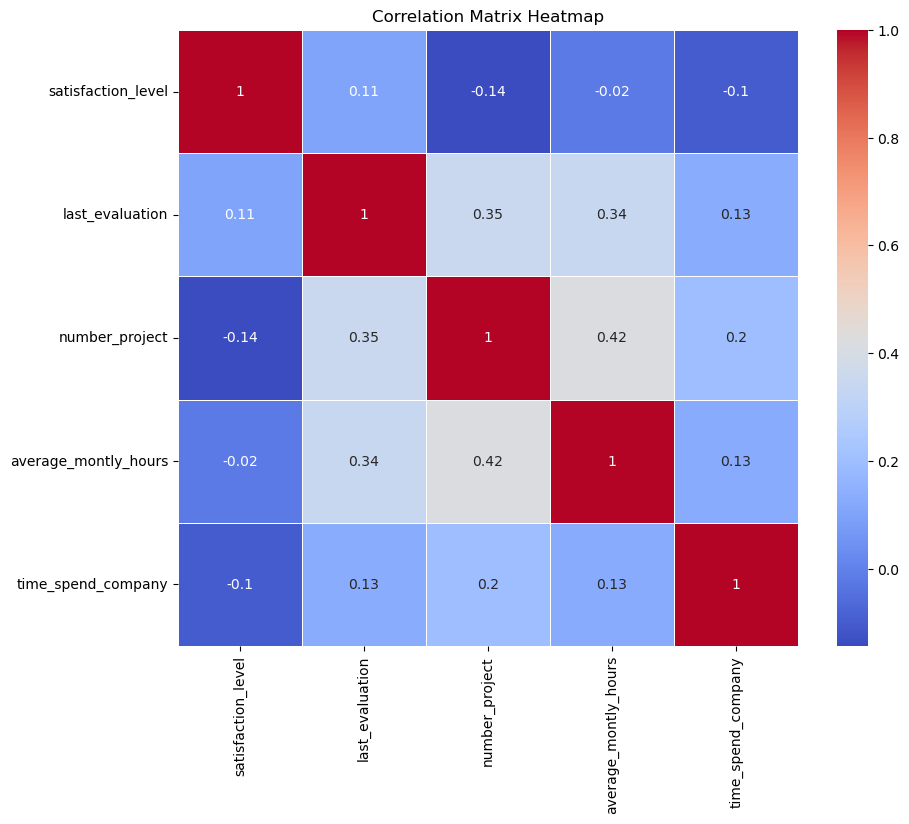

In [6]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [7]:
# Select the columns
satisfaction_data = data["satisfaction_level"]
evaluation_data = data["last_evaluation"]
hours_data = data["average_montly_hours"]

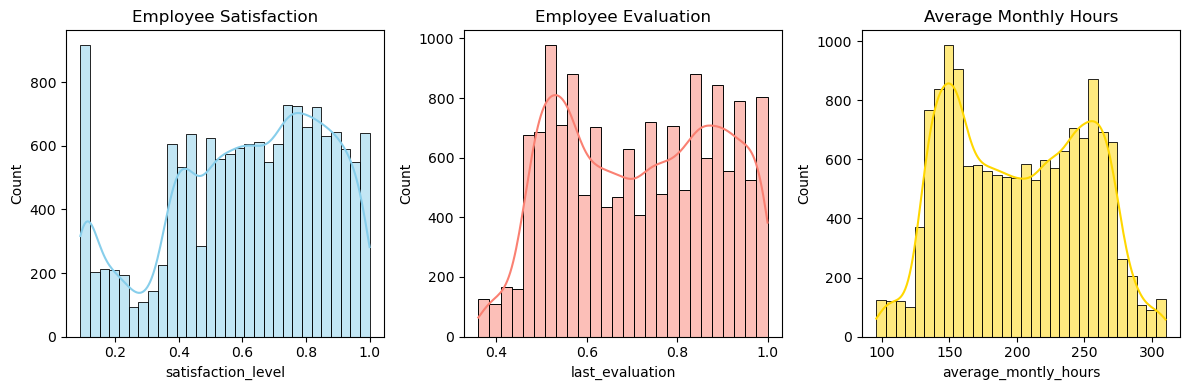

In [8]:
# Create distribution plots
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(satisfaction_data, kde=True, color="skyblue")
plt.title("Employee Satisfaction")

plt.subplot(132)
sns.histplot(evaluation_data, kde=True, color="salmon")
plt.title("Employee Evaluation")

plt.subplot(133)
sns.histplot(hours_data, kde=True, color="gold")
plt.title("Average Monthly Hours")

plt.tight_layout()
plt.show()

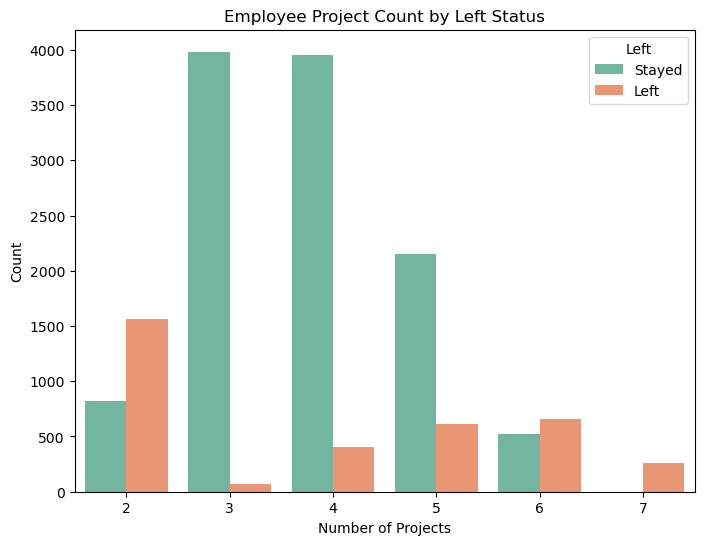

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="number_project", hue="left", palette="Set2")
plt.title("Employee Project Count by Left Status")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

In [10]:
# Select the relevant columns
left_employees_data = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]

In [11]:
# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees_data['cluster'] = kmeans.fit_predict(left_employees_data)

/Users/sheiljasheth/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


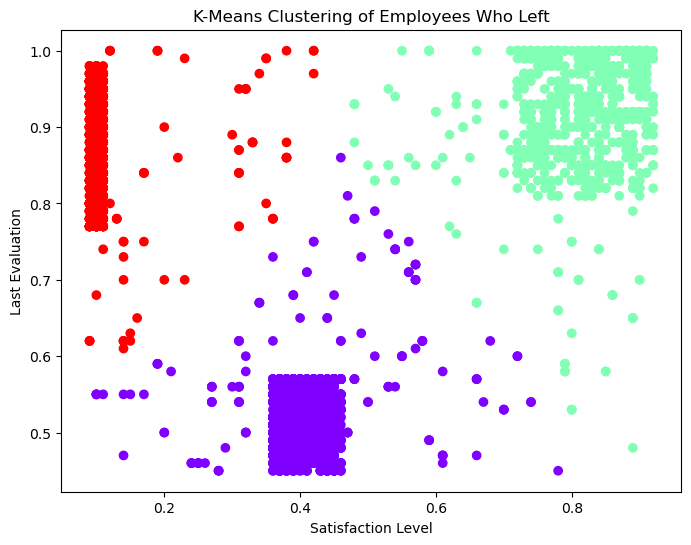

In [12]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(left_employees_data['satisfaction_level'], left_employees_data['last_evaluation'], c=left_employees_data['cluster'], cmap='rainbow')
plt.title('K-Means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

In [ ]:
# Thoughts on employee clusters
# 1. Low Satisfaction, High Evaluation: These employees left despite receiving high evaluations. They might be dissatisfied with other aspects of their job, such as workload or work-life balance.
# 2. Low Satisfaction, Low Evaluation: These employees left with both low satisfaction and low evaluations, indicating a general dissatisfaction with their work.
# 3. Moderate Satisfaction, Moderate Evaluation: This group might represent a mix of employees who left for various reasons, and further analysis is needed to understand their specific circumstances.

In [13]:
categorical_cols = ["department", "salary"]
numeric_cols = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]

In [14]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [15]:
# All features except the target variable
X = data.drop("left", axis=1)

# Target variable
y = data["left"]

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [17]:
# Split the data into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [18]:
# SMOTE object
smote = SMOTE(random_state=123)

# Upsample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=123)),
    ("Random Forest Classifier", RandomForestClassifier(random_state=123)),
    ("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=123))
]


In [20]:
def evaluate_models(models, X, y):
    plt.figure(figsize=(16, 8))
    
    for name, model in models:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
        y_pred = cross_val_predict(model, X, y, cv=cv)
        report = classification_report(y, y_pred, target_names=["Stayed", "Left"], output_dict=True)
        
        # Plot the classification report
        plt.subplot(1, len(models), models.index((name, model)) + 1)
        plt.title(name)
        sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="Blues", fmt='.2f', cbar=False)
        
    plt.show()

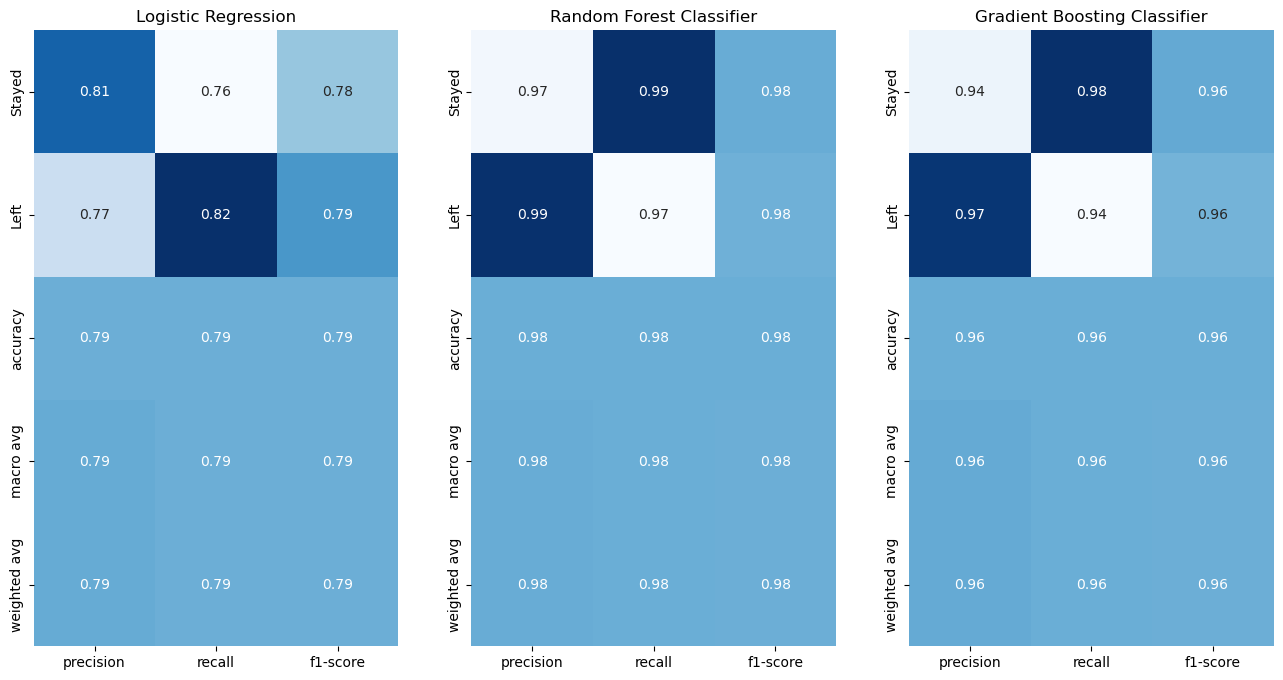

In [43]:
evaluate_models(models, X_train_resampled, y_train_resampled)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      Stayed       0.81      0.76      0.78      9142
        Left       0.77      0.82      0.80      9142

    accuracy                           0.79     18284
   macro avg       0.79      0.79      0.79     18284
weighted avg       0.79      0.79      0.79     18284



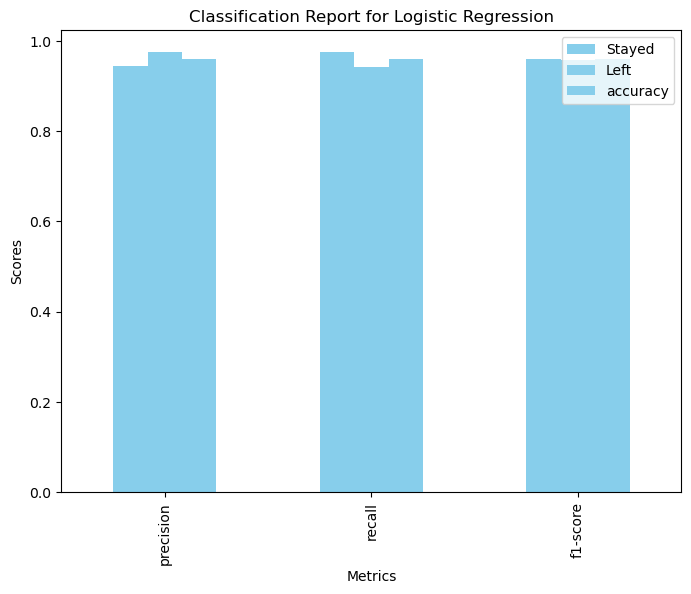

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Stayed       0.97      0.99      0.98      9142
        Left       0.99      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.98      0.98      0.98     18284
weighted avg       0.98      0.98      0.98     18284



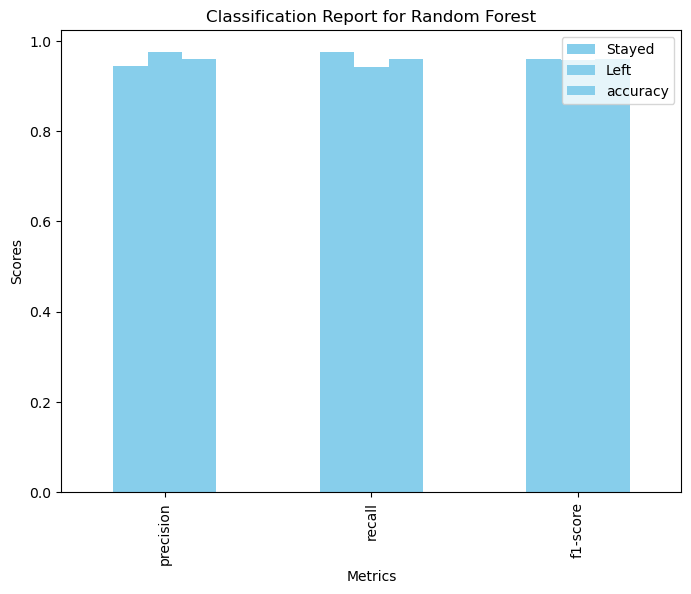

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

      Stayed       0.95      0.98      0.96      9142
        Left       0.97      0.94      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



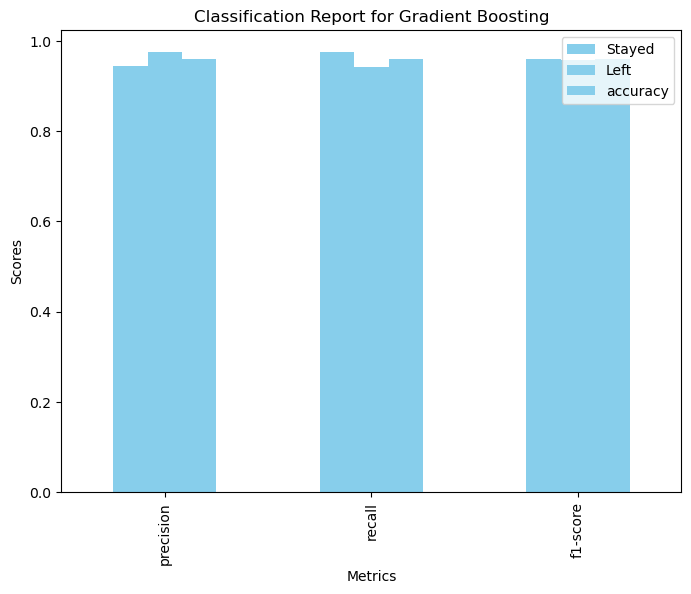

In [22]:
# Create models
logistic_model = LogisticRegression(max_iter=1000, random_state=123)
random_forest_model = RandomForestClassifier(random_state=123)
gradient_boosting_model = GradientBoostingClassifier(random_state=123)

models = [logistic_model, random_forest_model, gradient_boosting_model]

# Create lists to store classification reports
classification_reports = []

# Create a list of model names for labeling
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Perform 5-Fold Cross-Validation and generate classification reports for each model
for model, model_name in zip(models, model_names):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=skf)
    classification_report_str = classification_report(y_train_resampled, y_pred, target_names=["Stayed", "Left"])
    classification_reports.append((model_name, classification_report_str))

# Print and optionally plot classification reports
for model_name, report in classification_reports:
    print(f"Classification Report for {model_name}:\n{report}")

    # You can also plot the classification report if needed
    report_dict = classification_report(y_train_resampled, y_pred, target_names=["Stayed", "Left"], output_dict=True)
    df = pd.DataFrame(report_dict)
    df.iloc[:-1, :3].plot(kind='bar', color='skyblue', figsize=(8, 6))
    plt.title(f"Classification Report for {model_name}")
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.show()

In [25]:
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=123)

In [31]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=123)

# Fit the Random Forest model with training data
random_forest_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=123)

In [33]:
gradient_boosting_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=123)

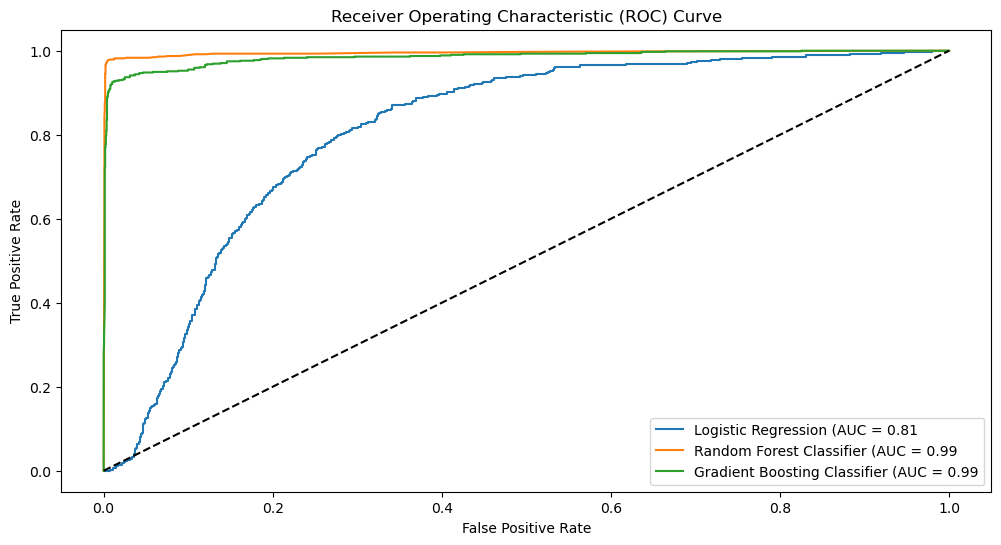

Logistic Regression Confusion Matrix:
[[1718  568]
 [ 177  537]]
Random Forest Classifier Confusion Matrix:
[[2265   21]
 [  15  699]]
Gradient Boosting Classifier Confusion Matrix:
[[2226   60]
 [  45  669]]
The best model is Random Forest Classifier with an AUC of 0.99


In [34]:
models = [
    ("Logistic Regression", logistic_model),
    ("Random Forest Classifier", random_forest_model),
    ("Gradient Boosting Classifier", gradient_boosting_model)
]

# Initialize best_model and best_auc
best_model = None
best_auc = 0

# Create a function to evaluate ROC/AUC
def evaluate_roc_auc(models, X, y):
    global best_model, best_auc

    plt.figure(figsize=(12, 6))
    
    for name, model in models:
        y_scores = model.predict_proba(X)[:, 1]
        auc = roc_auc_score(y, y_scores)
        fpr, tpr, _ = roc_curve(y, y_scores)
        
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f}")
        
        if auc > best_auc:
            best_auc = auc
            best_model = name

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Create a function to evaluate confusion matrices
def evaluate_confusion_matrices(models, X, y):
    for name, model in models:
        y_pred = model.predict(X)
        cm = confusion_matrix(y, y_pred)
        print(f"{name} Confusion Matrix:")
        print(cm)

# Call the functions to evaluate ROC/AUC and confusion matrices
evaluate_roc_auc(models, X_test, y_test)
evaluate_confusion_matrices(models, X_test, y_test)

# Identify the best model based on AUC
print(f"The best model is {best_model} with an AUC of {best_auc:.2f}")

In [42]:
predicted_probabilities = logistic_model.predict_proba(X_test)[:, 1]

employee_zones = []

for probability in predicted_probabilities:
    if probability < 0.2:
        employee_zones.append("Safe Zone (Green)")
    elif 0.2 <= probability < 0.6:
        employee_zones.append("Low Risk Zone (Yellow)")
    elif 0.6 <= probability < 0.9:
        employee_zones.append("Medium Risk Zone (Orange)")
    else:
        employee_zones.append("High Risk Zone (Red)")
        
for i, zone in enumerate(employee_zones):
    print(f"Employee {i+1}: {zone}")

Employee 1: Safe Zone (Green)
Employee 2: Medium Risk Zone (Orange)
Employee 3: Low Risk Zone (Yellow)
Employee 4: Safe Zone (Green)
Employee 5: Medium Risk Zone (Orange)
Employee 6: Safe Zone (Green)
Employee 7: Safe Zone (Green)
Employee 8: Safe Zone (Green)
Employee 9: Safe Zone (Green)
Employee 10: Low Risk Zone (Yellow)
Employee 11: Medium Risk Zone (Orange)
Employee 12: Medium Risk Zone (Orange)
Employee 13: Medium Risk Zone (Orange)
Employee 14: Safe Zone (Green)
Employee 15: Low Risk Zone (Yellow)
Employee 16: Low Risk Zone (Yellow)
Employee 17: Low Risk Zone (Yellow)
Employee 18: Safe Zone (Green)
Employee 19: Low Risk Zone (Yellow)
Employee 20: Medium Risk Zone (Orange)
Employee 21: Low Risk Zone (Yellow)
Employee 22: Low Risk Zone (Yellow)
Employee 23: Safe Zone (Green)
Employee 24: High Risk Zone (Red)
Employee 25: Safe Zone (Green)
Employee 26: Safe Zone (Green)
Employee 27: Low Risk Zone (Yellow)
Employee 28: Medium Risk Zone (Orange)
Employee 29: Low Risk Zone (Yellow)
E

1. Safe Zone (Green) (Score < 20%): low risk of turnover.
    - Focus on maintaining motivation and engagement.Recognize and reward contributions.
    - Offer career development opportunities and mentorship to encourage commitment.

2. Low Risk Zone (Yellow) (20% < Score < 60%): moderate turnover risk.
    - Conduct periodic check-ins and performance assessments.
    - Provide training and skills development to enhance job satisfaction. Pinpoint and address any dissatisfaction. 

3. Medium Risk Zone (Orange) (60% < Score < 90%):higher turnover risk.
    - Implement proactive retention strategies (i.e. personalized coaching, feedback, address any concerns,and pinpoint any dissatsfaction)  
    - Offer opportunities for growth, promotions, and a supportive work environment to increase commitment.

4. High Risk Zone (Red) (Score > 90%): highest risk of turnover.
    - identify and address root causes of dissatisfaction (i.e. workload, lack of recognition, or other issues)
    - Offer retention incentives such as better compensation, benefits, or flexible work arrangements to retain critical talent. 